In [145]:
# Import all the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import string
import nltk
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [3]:
# Set a color code template for the charts to maintain consistency
color_code = ['#2f312d', '#e73a8c']

In [4]:
# Boston datasets

listings_boston = pd.read_csv("./airbnb_boston/listings.csv")
calendar_boston = pd.read_csv("./airbnb_boston/calendar.csv")
reviews_boston = pd.read_csv("./airbnb_boston/reviews.csv")

# Seattle datasets

listings_seattle = pd.read_csv("./airbnb_seattle/listings.csv")
calendar_seattle = pd.read_csv("./airbnb_seattle/calendar.csv")
reviews_seattle = pd.read_csv("./airbnb_seattle/reviews.csv")

# Set option to show all columns while using head
pd.set_option("display.max_columns", None)

In [5]:
# Show the list of columns with more than 90% missing values

boston_90perc_missing = list(listings_boston.columns[listings_boston.isnull().mean() > 0.90])
seattle_90perc_missing = list(listings_seattle.columns[listings_seattle.isnull().mean() > .90])

print("Boston Listings data and the list of the following columns with more than 90% missing values: {}".format(boston_90perc_missing)) 
print(" ")
print("Seattle Listings data and the list of the following columns with more than 90% missing values: {}".format(seattle_90perc_missing))

Boston Listings data and the list of the following columns with more than 90% missing values: ['neighbourhood_group_cleansed', 'square_feet', 'has_availability', 'license', 'jurisdiction_names']
 
Seattle Listings data and the list of the following columns with more than 90% missing values: ['square_feet', 'license']


In [6]:
# Print out the shape of all the dataframes in the environment

all_dfs = [listings_boston, calendar_boston, reviews_boston, listings_seattle, calendar_seattle, reviews_seattle]
all_dfs_name = ['listings_boston', 'calendar_boston', 'reviews_boston', 'listings_seattle', 'calendar_seattle', 'reviews_seattle']

for i in range(0,6):
    print("The shape of "+str(all_dfs_name[i])+" is: " +str(all_dfs[i].shape))

The shape of listings_boston is: (3585, 95)
The shape of calendar_boston is: (1308890, 4)
The shape of reviews_boston is: (68275, 6)
The shape of listings_seattle is: (3818, 92)
The shape of calendar_seattle is: (1393570, 4)
The shape of reviews_seattle is: (84849, 6)


## Questions to answer from the data

The Airbnb listings dataset is an open dataset on Kaggle and is one of the most popular ones to work on both analytics and modeling. In this project, we look at the data from various lenses to try and understand the intricacies in the same.

Moreover, we also try to answer some of the questions formulated below by using the data for the city of Boston and Seattle. (Though there's a lot of questions that we can answer using the dataset, we will only focus on a few for the scope of this project.

* Which category of property type tend to be at a pricier end?
* Is there a relationship between the prices and the region where the property is located?
* Which times are the best to travel to these cities?
* Are the quantity of reviews and prices correlated to each other?

In [150]:
# Uncomment the required table to look at the first few rows

# listings_boston.head(5)
# calendar_boston.head(5)
# reviews_boston.head(5)
# listings_seattle.head(5)
# calendar_seattle.head(5)
# reviews_seattle.head(5)

In [8]:
# Selecting some of the columns which would help answer some of the listed questions above

listings_boston_subset = listings_boston[['id', 'house_rules', 'host_since', 'last_scraped', 'host_neighbourhood', 
                                          'host_location','host_response_rate', 'host_response_time', 'host_acceptance_rate', 
                                          'host_is_superhost', 'latitude', 'longitude', 'property_type', 'room_type', 
                                          'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'number_of_reviews', 
                                          'review_scores_rating', 'accommodates']]
listings_boston_subset['Category'] = 'Boston'

listings_seattle_subset = listings_seattle[['id', 'host_since', 'last_scraped', 'host_location', 'host_neighbourhood', 
                                            'host_response_rate', 'host_response_time', 'host_acceptance_rate', 
                                            'host_is_superhost', 'latitude', 'longitude', 'property_type', 'room_type', 
                                            'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'number_of_reviews', 
                                            'review_scores_rating', 'accommodates']]
listings_seattle_subset['Category'] = 'Seattle'

listings_combined = listings_boston_subset.append(listings_seattle_subset)
listings_combined.head(1)

id                                        house_rules  host_since  \
0  12147973  Clean up and treat the home the way you'd like...  2015-04-15   

  last_scraped host_neighbourhood                         host_location  \
0   2016-09-07         Roslindale  Boston, Massachusetts, United States   

  host_response_rate host_response_time host_acceptance_rate  \
0                NaN                NaN                  NaN   

  host_is_superhost   latitude  longitude property_type        room_type  \
0                 f  42.282619 -71.133068         House  Entire home/apt   

   bathrooms  bedrooms  beds  \
0        1.5       2.0   3.0   

                                           amenities    price  \
0  {TV,"Wireless Internet",Kitchen,"Free Parking ...  $250.00   

   number_of_reviews  review_scores_rating  accommodates Category  
0                  0                   NaN             4   Boston

In [9]:
# For some of the integer columns we remove the special characters like $ and , so that pandas
# treats them as integer while performing analyses

cols = ['host_response_rate', 'host_acceptance_rate', 'price']
for col in cols:
    listings_combined[col] = listings_combined[col].str.extract(r'(\d+)')
    listings_combined[col] = listings_combined[col].astype('float')

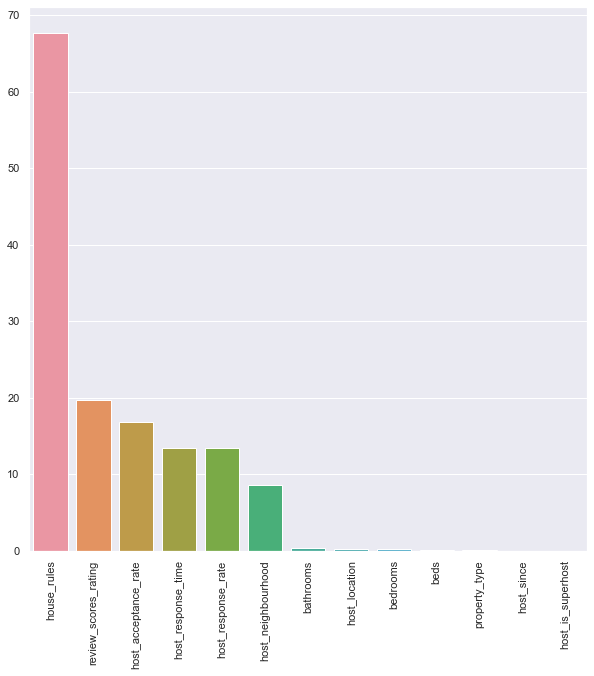

In [154]:
# Plot the percentage of missing values for the columns to be used

missing_values = (listings_combined.isna().sum() * 100 / listings_combined.shape[0]).sort_values(ascending=False)
plt.figure(figsize = (10,10))
sns.barplot(missing_values[missing_values > 0].index, missing_values[missing_values > 0].values)
plt.xticks(rotation = 'vertical')
plt.show()

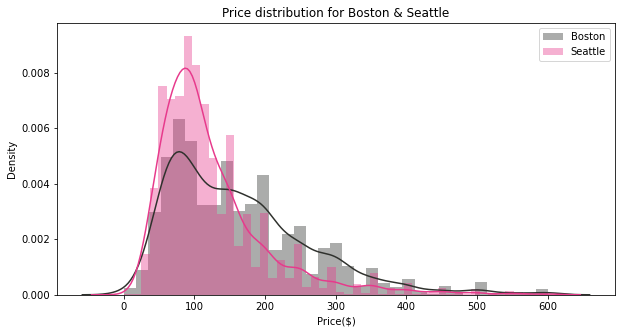

In [11]:
# This is a general price distribution for Boston and Seattle to get a sense

plt.figure(figsize = (10,5))
sns.distplot(listings_combined.price.loc[(listings_combined['price'] <= 600) & (listings_combined['Category'] == 'Boston')], kde = True, color = '#2f312d', label = 'Boston')
sns.distplot(listings_combined.price.loc[(listings_combined['price'] <= 600) & (listings_combined['Category'] =='Seattle')], kde = True, color = '#e73a8c', label = 'Seattle')
plt.title('Price distribution for Boston & Seattle')
plt.xlabel("Price($)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Removed outlier prices above $600 to remove noise from this visualization

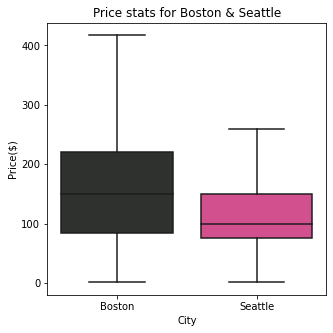

In [12]:
# A boxplot to understand the price ranges in Boston and Seattle. Boston is evidently pricier

plt.figure(figsize = (5,5))
sns.set_palette(sns.color_palette(color_code))
sns.boxplot(x=listings_combined.Category, y =listings_combined.price, data = listings_combined, showfliers = False)
# sns.boxplot(listings_seattle_subset.price)
plt.title('Price stats for Boston & Seattle')
plt.xlabel("City")
plt.ylabel("Price($)")
plt.show()

### Which category of property type tend to be at a pricier end?

When it comes to booking for a stay, there are multiple factors that consumers consider like listing reviews, location, price and various other factors.

We consider the listings data for Boston and Seattle to check out the price variation across the various property types to understand the cheapest and the most expensive

#### Insights for Boston
* The average prices of Guesthouse(\\$289), Boat(\\$268) and Other(\\$229) are the most expensive in the city of Boston
* The least expensive property types include that of Camper/RV (\\$60), Dorm (\\$62.5) and Entire Floor (\\$122)

**_While Guesthouse is the most expensive property in the city, Camper/RV is the cheapest of all._** Given the mid-point of the average price ranges, Apartments seem to be the most optimal choice with an average price of \\$175

#### Insights for Seattle
* The most expensive property types in Seattle (in terms of average prices) are Boat(\\$282), Condominium(\\$151) and Loft(\\$135)
* The cheapest property types include Dorm(\\$39.5), Tent(\\$54) and Other(\\$94.6)

**_To sum it up, Boats at a higher end when it comes to prices while Dorms are the cheapest options for stay in the city of Seattle_**. The optimal options for stay in terms of prices are Bed & Breakfast and Bungalow with average prices at \\$112 and \\$115 respectively.

Text(3.674999999999997, 0.5, 'Average Price ($)')

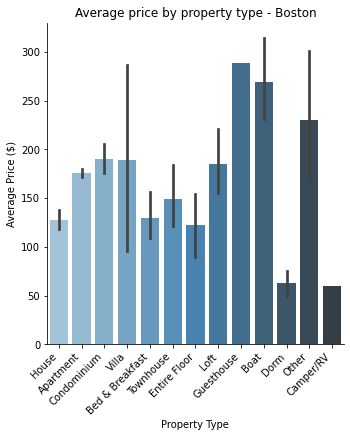

In [13]:
# Plot the average price against property types to understand price-property variations

listings_filtered_boston = listings_combined.loc[listings_combined['Category'].isin(['Boston'])]

catplot_boston=sns.catplot(x='property_type', y='price', kind='bar', data=listings_filtered_boston, palette='Blues_d')
catplot_boston.set_xticklabels(rotation=45, horizontalalignment='right').set_axis_labels('Property Type', 'Price($)')
plt.title('Average price by property type - Boston')
plt.xlabel("Property Type")
plt.ylabel("Average Price ($)")

Text(3.674999999999997, 0.5, 'Average Price ($)')

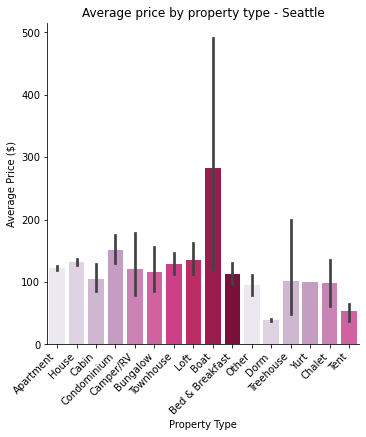

In [14]:
# Plot the average price against property types to understand price-property variations

listings_filtered_seattle = listings_combined.loc[listings_combined['Category'].isin(['Seattle'])]

sequential_colors = sns.color_palette("PuRd", 10) # Setting a gradient color pallette for the chart below

catplot_seattle=sns.catplot(x='property_type', y='price', kind='bar', data=listings_filtered_seattle, palette=sequential_colors)
catplot_seattle.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title('Average price by property type - Seattle')
plt.xlabel("Property Type")
plt.ylabel("Average Price ($)")

### Is there a relationship between the prices and the neighbourhood where the property is located?

Another factor to consider while considering a place to stay for the vacation are the property location. There might be numerous factors coming into play when it comes to the price of the property.

Region of the listing is an important factor that affects the price, based on the availabilty of amenities nearby, accessibility to transport and many others. Considering the price, we want to look at the comparison of the same across neighbourhoods in Boston and Seattle.

From the boxplots, here are some of the insights that can be inferred

#### Boston
* Bernal Heights, Sunnyvale and Chelsea have some of the most expensive listings, in the city of Boston with the median price being more than \\$300 on an average
* East Harlem, Chestnut Hill and Mattapan are the cheapest neighbourhoods in terms of Airbnb property listings with the median price being approximately \\$65

#### Seattle
* Kaanapali, Beverly Hills and Kaua ªi are some of the neighbourhoods with the most expensive Airbnb listings with the prices being more than \\$350
* Santa Monica, Roxhill and South Beacon Hill are the cheapest listings in the city of Seattle with the median prices approximately \\$60

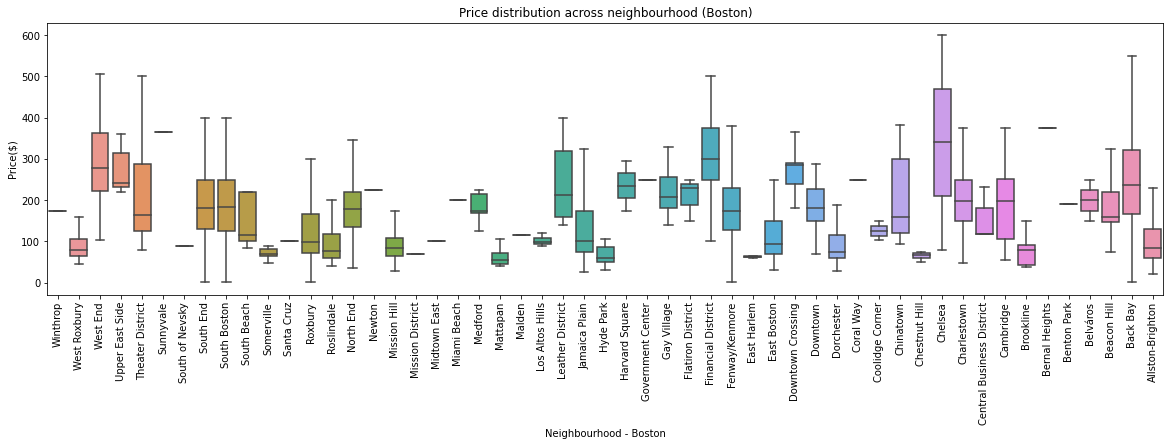

In [15]:
# Check the price variation across different neighbourhoods in Boston and Seattle to check the highs and lows

order_by_price = listings_filtered_boston.groupby(by=["host_neighbourhood"])["price"].median().iloc[::-1].index

plt.figure(figsize = (20,5))
neighbourhood_boxplot = sns.boxplot(x=listings_filtered_boston.host_neighbourhood, y = listings_filtered_boston.price, data = listings_filtered_boston, showfliers = False, order = order_by_price)
neighbourhood_boxplot.set_xticklabels(neighbourhood_boxplot.get_xticklabels(),rotation='vertical')
plt.title('Price distribution across neighbourhood (Boston)')
plt.xlabel("Neighbourhood - Boston")
plt.ylabel("Price($)")
plt.show()

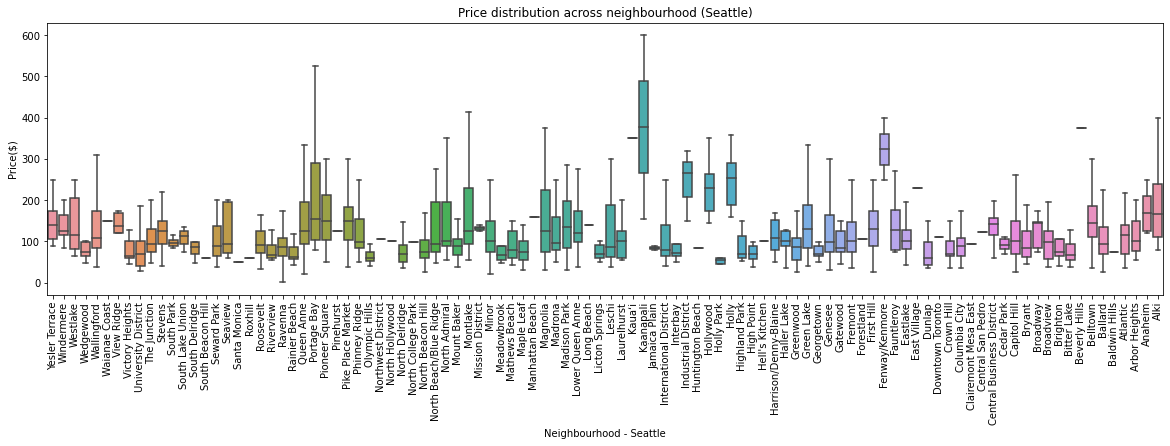

In [16]:
# Check the price variation across different neighbourhoods in Boston and Seattle to check the highs and lows

order_by_price = listings_filtered_seattle.groupby(by=["host_neighbourhood"])["price"].median().iloc[::-1].index

plt.figure(figsize = (20,5))
neighbourhood_boxplot = sns.boxplot(x=listings_filtered_seattle.host_neighbourhood, y = listings_filtered_seattle.price, data = listings_filtered_seattle, showfliers = False, order = order_by_price)
neighbourhood_boxplot.set_xticklabels(neighbourhood_boxplot.get_xticklabels(),rotation='vertical')
plt.title('Price distribution across neighbourhood (Seattle)')
plt.xlabel("Neighbourhood - Seattle")
plt.ylabel("Price($)")
plt.show()

### Which times are the best to travel to these cities?

When one plans to visit a country/city, the time of the month and day is very important to consider. Vacations turn out to be ideal depending on a lot of factors like-
* Cheap lodging and staying facilities
* Readily available properties to book and availability of choices
* Season and weather of the location

Now, we use the data to look at some of these factors to find if and when does Boston and Seattle have listings available to the customers and also how do the prices look like.

#### Boston
- For the city of Boston, the availabilites for properties go up during the end of year and also the first quarter of the year. This may be due to the fact that the holiday seasons come up and not a lot of people prefer to travel during these times.
- April seems like the worst time to travel to Boston as the available properties plummets during this month.
- Coming to the prices, the average prices go down to \\$150 during the first quarter of the year while they are the highest during September, October and November with a median price of about ~\\$240

#### Seattle
- The listings are available for 2016 for Seattle. The availabilities for properties are the highest during the end of first quarter and the beginning of the second quarter of the year
- The availabilites are the lowest during the first quarter of the year 2016 and is not a preferable time to travel as availabilities are very low
- The average prices are the highest during the month of June, July and August and should not be considered to visit by price sensitive customers. The average prices sky rocket to \\$150 while the prices come down to \\$120 during the month of January

In [125]:
# For some of the integer columns we remove the special characters like $ so that pandas
# treats them as integer while performing analyses

cols = ['price']
for col in cols:
    calendar_boston[col] = calendar_boston[col].str.extract(r'(\d+)')
    calendar_boston[col] = calendar_boston[col].astype('float')

In [126]:
calendar_boston[calendar_boston['available'] == 't'].sort_values(['date']).head(5)

listing_id        date available  price
709194      7874552  2016-09-06         t  147.0
723429      6410674  2016-09-06         t   95.0
1130039     1644031  2016-09-06         t  115.0
10584        321328  2016-09-06         t  100.0
158044      5526487  2016-09-06         t  275.0

In [129]:
# Aggregate the daily unique listings to understand the trend of availabilities over the months

boston_daily = calendar_boston[calendar_boston.available == 't'].groupby(by = ['date'], as_index = False)['listing_id'].nunique()
boston_daily['date'] = pd.to_datetime(boston_daily['date'])
# boston_daily

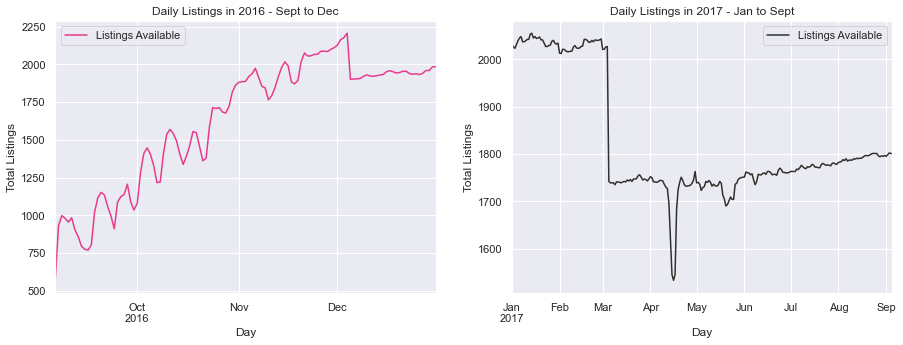

In [133]:
# Plot the daily unique listings to understand the trend of availabilities over the months

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.set()
boston_daily[(boston_daily['date'].dt.year == 2016)].groupby(['date'])['listing_id'].sum().plot(label='Listings Available', color = '#e73a8c')
plt.title('Daily Listings in 2016 - Sept to Dec')
plt.xlabel("Day")
plt.ylabel("Listings Available")
plt.legend()
plt.subplot(1,2,2)
boston_daily[(boston_daily['date'].dt.year == 2017)].groupby(['date'])['listing_id'].sum().plot(label='Listings Available', color = '#2f312d')
plt.title('Daily Listings in 2017 - Jan to Sept')
plt.xlabel("Day")
plt.ylabel("Listings Available")
plt.legend()

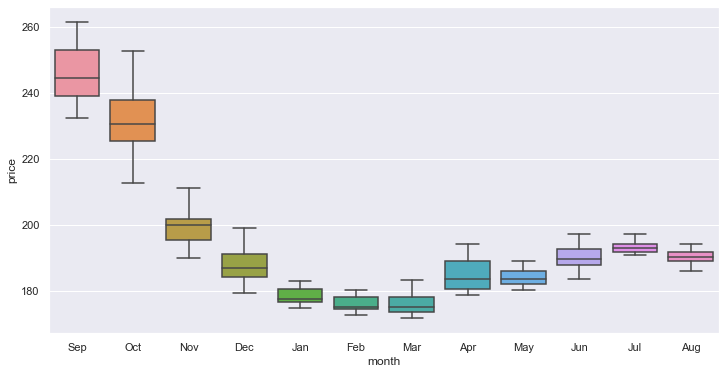

In [128]:
# Average prices of properties in Boston over the months

boston_month_price = calendar_boston[calendar_boston.available == 't'].groupby(by = ['date'], as_index = False)['price'].mean()
boston_month_price['date'] = pd.to_datetime(boston_daily['date'])
boston_month_price['month'] = boston_month_price['date'].dt.strftime('%b')
fig, ax = plt.subplots()
fig.set_size_inches((12,6))
sns.boxplot(x='month', y='price', data=boston_month_price, ax=ax, showfliers = False)
plt.show()

In [136]:
# Aggregate the daily unique listings to understand the trend of availabilities over the months

seattle_daily = calendar_seattle[calendar_seattle.available == 't'].groupby(by = ['date'], as_index = False)['listing_id'].nunique()
seattle_daily['date'] = pd.to_datetime(seattle_daily['date'])
# seattle_daily

Text(0, 0.5, 'Listings Available')

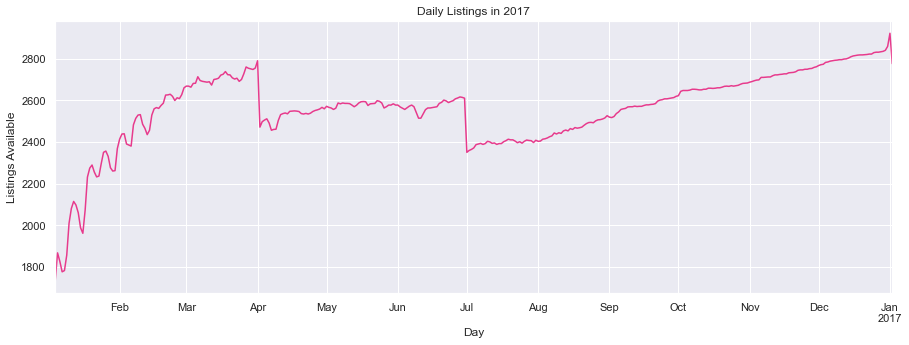

In [134]:
# Plot the daily unique listings to understand the trend of availabilities over the months

plt.figure(figsize = (15,5))
seattle_daily.groupby(['date'])['listing_id'].sum().plot(label='Listings', color = '#e73a8c')
plt.title("Daily Listings in 2016")
plt.xlabel("Day")
plt.ylabel("Listings Available")

In [123]:
# For some of the integer columns we remove the special characters like $ and , so that pandas
# treats them as integer while performing analyses

cols = ['price']
for col in cols:
    calendar_seattle[col] = calendar_seattle[col].str.extract(r'(\d+)')
    calendar_seattle[col] = calendar_seattle[col].astype('float')

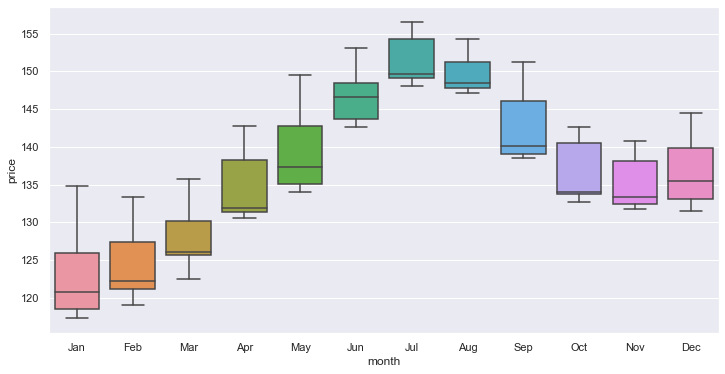

In [124]:
# Average prices of properties in Seattle over the months

seattle_month_price = calendar_seattle[calendar_seattle.available == 't'].groupby(by = ['date'], as_index = False)['price'].mean()
seattle_month_price['date'] = pd.to_datetime(seattle_daily['date'])
seattle_month_price['month'] = seattle_month_price['date'].dt.strftime('%b')
boston_month_price
fig, ax = plt.subplots()
fig.set_size_inches((12,6))
sns.boxplot(x='month', y='price', data=seattle_month_price, ax=ax, showfliers = False)
plt.show()

### Are the quantity of reviews and prices correlated to each other?

From the visuals below, it is evident that there is a higher concentration of reviews at the lower price bands. This is suggestive of the fact that there have been more bookings for lower priced properties.

This corroborates our hypothesis that consumers are price sensitive and tend to book properties more suited for their budget.

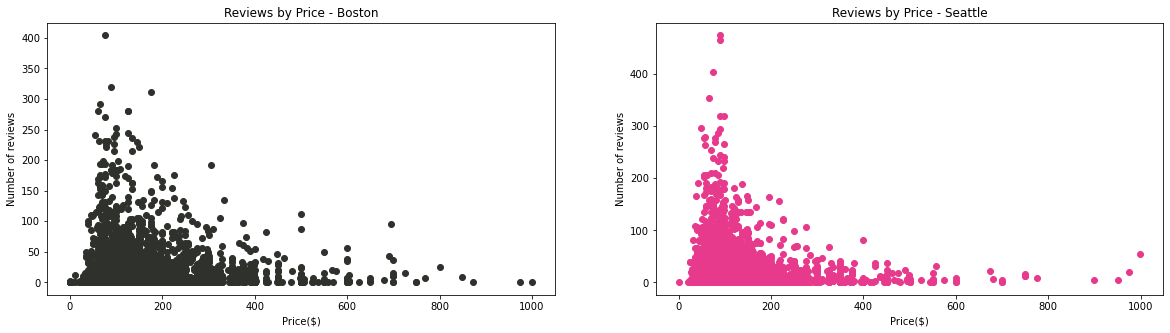

In [36]:
# Plot the number of reviews to price to get a sense of the review distribution for different price ranges

scatter_boston = listings_filtered_boston[['number_of_reviews', 'price']].sort_values(by = 'price')
scatter_seattle = listings_filtered_seattle[['number_of_reviews', 'price']].sort_values(by = 'price')

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.scatter(scatter_boston['price'], scatter_boston['number_of_reviews'], color = '#2f312d')
plt.title('Reviews by Price - Boston')
plt.xlabel("Price($)")
plt.ylabel("Number of reviews")
plt.subplot(1,2,2)
plt.scatter(scatter_seattle['price'], scatter_seattle['number_of_reviews'], color = '#e73a8c')
plt.title('Reviews by Price - Seattle')
plt.xlabel("Price($)")
plt.ylabel("Number of reviews")
plt.show()

In [ ]:
# Tried practicing my function building skills to find min and max of a column - IGNORE!

# def find_max_min(df, col):
#     max_val = df[col].max()
#     min_val = df[col].min()
#     return (max_val, min_val)

# print(find_max_min(listings_filtered_boston, 'latitude'))
# print(find_max_min(listings_filtered_boston, 'longitude'))